In [1]:
#import

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
#import data
data = pd.read_csv("../US_Accidents_May19.csv")



In [3]:
# trim data set to states and TCDs, visility and weather 
all_states = data.drop(columns=["ID","Source","TMC","Start_Time","End_Time", "Start_Lat","Start_Lng","End_Lat","End_Lng","Distance(mi)","Description","Number","Street","Side","City","County","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Wind_Direction","Wind_Speed(mph)","Precipitation(in)","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"])
#all_states.to_csv('../all_states.csv')


In [4]:
#get Georgia only
ga_only = all_states[all_states['State']=='GA']

#ga_only.to_csv('../ga_only.csv')


In [5]:
#all states losses with TCDs
all_stop_only = all_states[(all_states['Stop']==True)]
all_signal_only = all_states[(all_states['Traffic_Signal']==True)]
all_giveway_only = all_states[(all_states['Give_Way']==True)]

#Ga losses with TCDS
ga_stop_only = ga_only[(ga_only['Stop']==True)]
ga_signal_only = ga_only[(ga_only['Traffic_Signal']==True)]
ga_giveway_only = ga_only[(ga_only['Give_Way']==True)]



In [6]:
#all state avergae severity by TCD
all_avg_sever_stop = np.average(all_stop_only['Severity'])
all_avg_sever_signal = np.average(all_signal_only['Severity'])
all_avg_sever_giveway = np.average(all_giveway_only['Severity'])
#GA avergae severity by TCD
ga_avg_sever_stop = np.average(ga_stop_only['Severity'])
ga_avg_sever_signal = np.average(ga_signal_only['Severity'])
ga_avg_sever_giveway = np.average(ga_giveway_only['Severity'])

In [7]:
#get the counts of all to create a DF for count graph
all_counts = len(all_states['State'])
all_stop_counts = len(all_stop_only['Severity'])
all_signal_counts = len(all_signal_only['Severity'])
all_giveway_counts = len(all_giveway_only['Severity'])
#GA counts of all in to create a DF for count graph
ga_count = len(ga_only['State'])
ga_stop_counts = len(ga_stop_only['Severity'])
ga_signal_counts = len(ga_signal_only['Severity'])
ga_giveway_counts = len(ga_giveway_only['Severity'])




In [8]:
#get % of accidents in TCDS
all_stop_per = all_stop_counts/all_counts
all_signal_per = all_signal_counts/all_counts
all_giveway_per = all_giveway_counts/all_counts

#get % of accidents in ga at TCDS
ga_stop_per = ga_stop_counts/ga_count
ga_signal_per = ga_signal_counts/ga_count
ga_giveway_per = ga_giveway_counts/ga_count



In [9]:
#data frame for percantages
per_all_states = [['Stop', all_stop_per],['Signal', all_signal_per], ['Giveway',all_giveway_per]]
ga_per = [['Stop', ga_stop_per], ['Signal', ga_signal_per], ['Giveway',ga_giveway_per]]
all_per_df = pd.DataFrame(per_all_states, columns = ['TCD', 'Percentage'])
ga_per_df = pd.DataFrame(ga_per, columns = ['TCD', 'Percentage'])

In [10]:
#data frame to hold the average severity for all states and one for GA
all_data = [['stop', all_avg_sever_stop], ['signal', all_avg_sever_signal], ['giveway',all_avg_sever_giveway]]
ga_data = [['ga_stop', ga_avg_sever_stop], ['ga_signal', all_avg_sever_signal], ['ga_giveway',all_avg_sever_giveway]]
all_st_avg = pd.DataFrame(all_data, columns = ['TCD', 'Average'])
ga_st_avg = pd.DataFrame(ga_data, columns = ['GA_TCD', 'GA_Average'])


In [11]:
#data frame to loss counts
counts_all_states = [['All', all_counts], ['Stop', all_stop_counts],['Signal', all_signal_counts], ['Giveway',all_giveway_counts]]
ga_counts = [['GA', ga_count],['Stop', ga_stop_counts], ['Signal', ga_signal_counts], ['Giveway',ga_giveway_counts]]
all_counts_df = pd.DataFrame(counts_all_states, columns = ['Location', 'Counts'])
ga_counts_df = pd.DataFrame(ga_counts, columns = ['Location', 'Counts'])



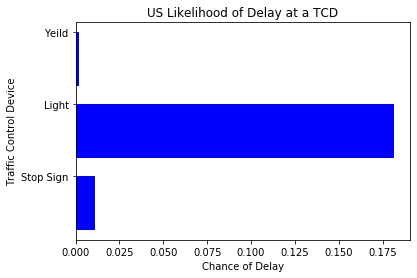

In [26]:
#all state likelyhood graph
x = ['Stop Sign', 'Light', 'Yeild']
y = all_per_df['Percentage']

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('US Likelihood of Delay at a TCD')
plt.xlabel('Chance of Delay')
plt.ylabel('Traffic Control Device')      
#plt.show()
plt.savefig('all_state_Likelyhood.png')

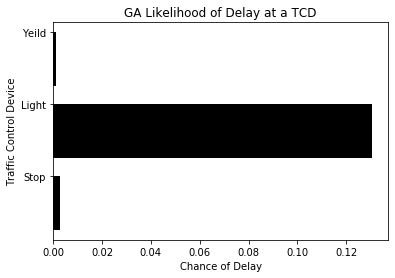

In [27]:
#GA likelyhood graph
x = ['Stop', 'Light', 'Yeild']
y = ga_per_df['Percentage']

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="black")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('GA Likelihood of Delay at a TCD')
plt.xlabel('Chance of Delay')
plt.ylabel('Traffic Control Device')      
#plt.show()
plt.savefig('ga_Likelyhood.png')

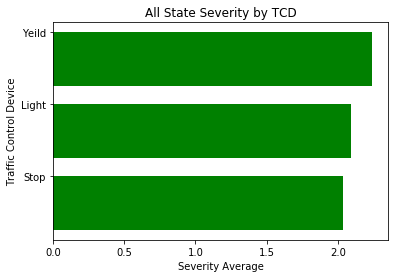

In [19]:
#all state Severity graph
x = ['Stop', 'Light', 'Yeild']
y = all_st_avg['Average']

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('All State Severity by TCD')
plt.xlabel('Severity Average')
plt.ylabel('Traffic Control Device')      
#plt.show()
plt.savefig('all_state_tcd_sev.png')

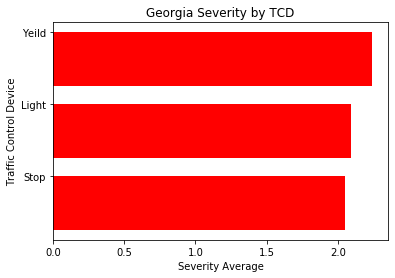

In [28]:
#GA Severity graph
x = ['Stop', 'Light', 'Yeild']
y = ga_st_avg['GA_Average']

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Georgia Severity by TCD')
plt.xlabel('Severity Average')
plt.ylabel('Traffic Control Device')      
#plt.show()
plt.savefig('ga_tcd_sev.png')